<a href="https://colab.research.google.com/github/anushavasup/Text-Generation-using-LSTM/blob/main/Text_Generation_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Text Generation using LSTM

#### Download important libraries

In [180]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer # called 'Tokenization' in some previous versions of keras
from keras.utils import to_categorical
import numpy as np

In [181]:
data = "The Indian Space Research Organization (IRSO) mission not only made history because it saw the nation become the fourth to successfully land on the moon — after the Soviet Union, the U.S. and China — but also because it named India the first to land at the southern lunar pole."

In [182]:
# Instantiate a tokenizer from keras and fit it on the train data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [183]:
# Let's check the word index of the vocabulary
tokenizer.word_index

{'the': 1,
 'because': 2,
 'it': 3,
 'to': 4,
 'land': 5,
 '—': 6,
 'indian': 7,
 'space': 8,
 'research': 9,
 'organization': 10,
 'irso': 11,
 'mission': 12,
 'not': 13,
 'only': 14,
 'made': 15,
 'history': 16,
 'saw': 17,
 'nation': 18,
 'become': 19,
 'fourth': 20,
 'successfully': 21,
 'on': 22,
 'moon': 23,
 'after': 24,
 'soviet': 25,
 'union': 26,
 'u': 27,
 's': 28,
 'and': 29,
 'china': 30,
 'but': 31,
 'also': 32,
 'named': 33,
 'india': 34,
 'first': 35,
 'at': 36,
 'southern': 37,
 'lunar': 38,
 'pole': 39}

#### Prepare sequences from the tokenizer

In [184]:
# Prepare sequences from the tokenizer
sequence = tokenizer.texts_to_sequences([data]) [0]

In [185]:
# Let's check the sequence
sequence

[1,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 2,
 3,
 17,
 1,
 18,
 19,
 1,
 20,
 4,
 21,
 5,
 22,
 1,
 23,
 6,
 24,
 1,
 25,
 26,
 1,
 27,
 28,
 29,
 30,
 6,
 31,
 32,
 2,
 3,
 33,
 34,
 1,
 35,
 4,
 5,
 36,
 1,
 37,
 38,
 39]

In [186]:
# Let's get unique tokens from the vocabulary
tokens = len(tokenizer.word_index)
tokens

39

In [187]:
# Let's prepare a training set from the above sample,
# where the input is a sequence of words and output is word following the
# sequence
train_seq = []
for i in range(2, len(sequence)):
    seq = sequence[i-2: i+3]
    while len(seq) != 5:
      seq.append(0)
    print(seq)
    train_seq.append(seq)

[1, 7, 8, 9, 10]
[7, 8, 9, 10, 11]
[8, 9, 10, 11, 12]
[9, 10, 11, 12, 13]
[10, 11, 12, 13, 14]
[11, 12, 13, 14, 15]
[12, 13, 14, 15, 16]
[13, 14, 15, 16, 2]
[14, 15, 16, 2, 3]
[15, 16, 2, 3, 17]
[16, 2, 3, 17, 1]
[2, 3, 17, 1, 18]
[3, 17, 1, 18, 19]
[17, 1, 18, 19, 1]
[1, 18, 19, 1, 20]
[18, 19, 1, 20, 4]
[19, 1, 20, 4, 21]
[1, 20, 4, 21, 5]
[20, 4, 21, 5, 22]
[4, 21, 5, 22, 1]
[21, 5, 22, 1, 23]
[5, 22, 1, 23, 6]
[22, 1, 23, 6, 24]
[1, 23, 6, 24, 1]
[23, 6, 24, 1, 25]
[6, 24, 1, 25, 26]
[24, 1, 25, 26, 1]
[1, 25, 26, 1, 27]
[25, 26, 1, 27, 28]
[26, 1, 27, 28, 29]
[1, 27, 28, 29, 30]
[27, 28, 29, 30, 6]
[28, 29, 30, 6, 31]
[29, 30, 6, 31, 32]
[30, 6, 31, 32, 2]
[6, 31, 32, 2, 3]
[31, 32, 2, 3, 33]
[32, 2, 3, 33, 34]
[2, 3, 33, 34, 1]
[3, 33, 34, 1, 35]
[33, 34, 1, 35, 4]
[34, 1, 35, 4, 5]
[1, 35, 4, 5, 36]
[35, 4, 5, 36, 1]
[4, 5, 36, 1, 37]
[5, 36, 1, 37, 38]
[36, 1, 37, 38, 39]
[1, 37, 38, 39, 0]
[37, 38, 39, 0, 0]


In [188]:
# convert to a numpy array
train_seq = np.array(train_seq)

In [189]:
# select first four words in the sequence for training
#select the fifth word in the sequence for testing
train_X, train_y = train_seq[:,:4], train_seq[:, 4]

In [190]:
train_X

array([[ 1,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 12],
       [10, 11, 12, 13],
       [11, 12, 13, 14],
       [12, 13, 14, 15],
       [13, 14, 15, 16],
       [14, 15, 16,  2],
       [15, 16,  2,  3],
       [16,  2,  3, 17],
       [ 2,  3, 17,  1],
       [ 3, 17,  1, 18],
       [17,  1, 18, 19],
       [ 1, 18, 19,  1],
       [18, 19,  1, 20],
       [19,  1, 20,  4],
       [ 1, 20,  4, 21],
       [20,  4, 21,  5],
       [ 4, 21,  5, 22],
       [21,  5, 22,  1],
       [ 5, 22,  1, 23],
       [22,  1, 23,  6],
       [ 1, 23,  6, 24],
       [23,  6, 24,  1],
       [ 6, 24,  1, 25],
       [24,  1, 25, 26],
       [ 1, 25, 26,  1],
       [25, 26,  1, 27],
       [26,  1, 27, 28],
       [ 1, 27, 28, 29],
       [27, 28, 29, 30],
       [28, 29, 30,  6],
       [29, 30,  6, 31],
       [30,  6, 31, 32],
       [ 6, 31, 32,  2],
       [31, 32,  2,  3],
       [32,  2,  3, 33],
       [ 2,  3, 33, 34],
       [ 3, 33, 34,  1],


In [191]:
train_X.shape

(49, 4)

In [192]:
train_y

array([10, 11, 12, 13, 14, 15, 16,  2,  3, 17,  1, 18, 19,  1, 20,  4, 21,
        5, 22,  1, 23,  6, 24,  1, 25, 26,  1, 27, 28, 29, 30,  6, 31, 32,
        2,  3, 33, 34,  1, 35,  4,  5, 36,  1, 37, 38, 39,  0,  0])

In [193]:
train_y.shape

(49,)

In [196]:
#let's convert target label into categorical
train_yC = to_categorical(train_y, num_classes=tokens+1) # since tokenizer starts indexing from 1 where as other funcs from 0

In [197]:
train_yC.shape

(49, 40)

In [198]:
train_yC[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

#### Embedding Layer
Embedding Layer contains the following parameters:
    
    input_dim: the size of the vocabulary
    output_dim: the size of the dense vector
    input_length: the length of the sequence

In [199]:
# let's define our model
model = Sequential()
model.add(Embedding(tokens+1, 10, input_length=4))
model.add(LSTM(32))
model.add(Dense(
                tokens+1, activation="softmax"))

In [200]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 4, 10)             400       
                                                                 
 lstm_12 (LSTM)              (None, 32)                5504      
                                                                 
 dense_12 (Dense)            (None, 40)                1320      
                                                                 
Total params: 7,224
Trainable params: 7,224
Non-trainable params: 0
_________________________________________________________________


In [201]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [202]:
history = model.fit(train_X, train_yC, epochs=500, verbose=True)

Epoch 1/500
2/2 [==============================] - 3s 13ms/step - loss: 3.6895 - accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 3.6875 - accuracy: 0.0816
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 3.6858 - accuracy: 0.1429
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 3.6840 - accuracy: 0.1633
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 3.6824 - accuracy: 0.1633
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 3.6808 - accuracy: 0.1633
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 3.6791 - accuracy: 0.1633
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 3.6774 - accuracy: 0.1633
Epoch 9/500
2/2 [==============================] - 0s 12ms/step - loss: 3.6755 - accuracy: 0.1429
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 3.6735 - accuracy: 0.1429
Epoch 11/500
2/

In [203]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [204]:
def plot_history(history):
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']

    x = range(1, len(train_acc) + 1)

    plt.figure(figsize=(12,5))
    plt.plot(x, train_acc, 'b', label='Training Accuracy')
    plt.plot(x, train_loss, 'r', label='Training Loss')
    plt.ylim(0,1.2)
    plt.title('Accuracy and Loss')
    plt.legend()

#### Check the training history

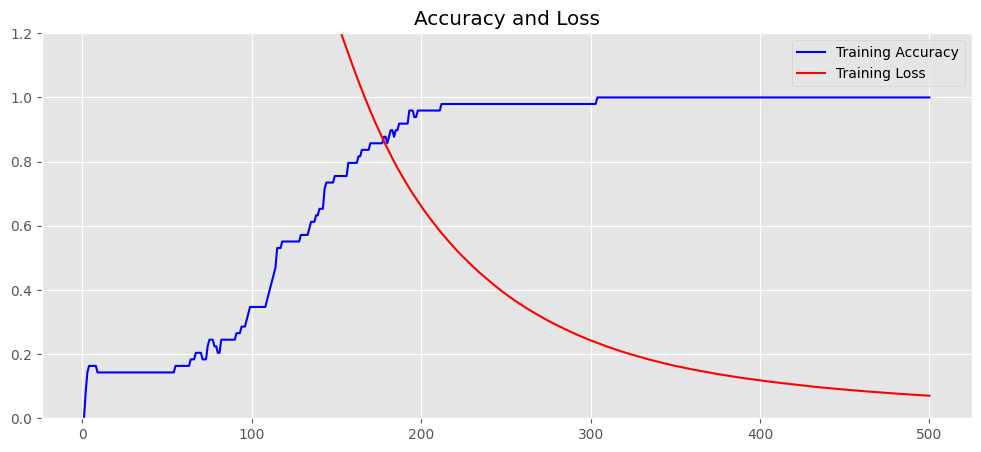

In [206]:
plot_history(history)

If we observe that loss over the time went down and accuracy went up with the iterations

#### Inference

In [210]:
def predict_word(text_with_input_words):
    seq = np.array(tokenizer.texts_to_sequences([text_with_input_words]))
    pred = np.argmax(model.predict(seq), axis=-1)

    pred_word = None
    for word, index in tokenizer.word_index.items():
        if index == pred[0]:
            return word


In [211]:
predict_word(['The', 'Indian', 'Space','Research'])

1/1 [==============================] - 0s 30ms/step


'organization'

In [219]:

predict_word(['first', 'to', 'land', 'at'])

1/1 [==============================] - 0s 21ms/step


'the'

In [220]:
predict_word(['to', 'land', 'at', 'the'])

1/1 [==============================] - 0s 27ms/step


'southern'

In [221]:
predict_word(['the', 'Soviet', 'Union', 'the'])

1/1 [==============================] - 0s 26ms/step


'u'